In [9]:
def plot_3d(x,y,y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(x[:,0], x[:,1], y, label='underlyng function')
    if y_pred is not None:
        ax.scatter(x[:,0], x[:,1], y_pred, label='our function')
    plt.legend()

x:(200, 2), weights:(2, 1), bias:(1,), y:(200, 1)


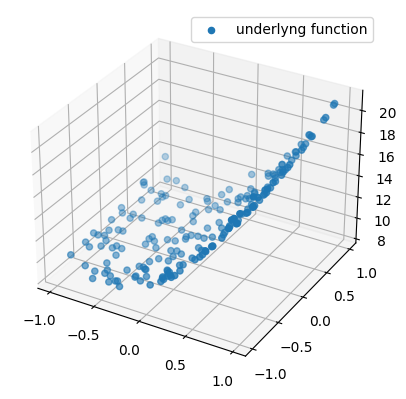

In [3]:

    
import numpy as np
import matplotlib.pyplot as plt

n = 200
d = 2 
x = np.random.uniform(-1,1,(n,d))

weights_true = np.array([[5,1],]).T
bias_true = np.array([10])

y_true = (x**2) @ weights_true + x @ weights_true + bias_true
print(f'x:{x.shape}, weights:{weights_true.shape}, bias:{bias_true.shape}, y:{y_true.shape}') 

plot_3d(x,y_true)    

In [19]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true-y_pred)**2).mean()
    
    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred-self.y_true)/n
        return self.gradient
    
class Linear:
    def __init__(self, input_dim: int, num_hidden: int=1):
        self.weights = np.random.randn(input_dim, num_hidden)-0.5
        self.bias = np.random.randn(num_hidden)-0.5
    
    def __call__(self,x):
        self.x=x
        output = x @ self.weights + self.bias
        return output

    def backward(self, gradient):
        self.weight_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum(axis=0)
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient
    
    def update(self, lr):
        self.weights = self.weights - lr * self.weight_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [7]:
from typing import Callable

def fit(x:np.ndarray, y:np.ndarray, model:Callable, loss:Callable, lr:float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred  = model(x)
        loss_value = loss(y_pred,y)
        print(f'Epoch:{epoch}, loss:{loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

Epoch:0, loss:176.4797168695274
Epoch:1, loss:116.46316232769594
Epoch:2, loss:77.69195749437645
Epoch:3, loss:52.56548514053355
Epoch:4, loss:36.213417841894056
Epoch:5, loss:25.513405177096992
Epoch:6, loss:18.462393259579482
Epoch:7, loss:13.774239693069354
Epoch:8, loss:10.622142932020903
Epoch:9, loss:8.47374697648987
Epoch:10, loss:6.985557530384141
Epoch:11, loss:5.935319613125422
Epoch:12, loss:5.17869409351811
Epoch:13, loss:4.621489760004928
Epoch:14, loss:4.201855299351228
Epoch:15, loss:3.878849840972291
Epoch:16, loss:3.6250997194111845
Epoch:17, loss:3.4220739976955996
Epoch:18, loss:3.257039204946269
Epoch:19, loss:3.121091612548904
Epoch:20, loss:3.0078816333261695
Epoch:21, loss:2.912783364259167
Epoch:22, loss:2.832350924381184
Epoch:23, loss:2.763959995001948
Epoch:24, loss:2.705569322859794
Epoch:25, loss:2.655560240439044
Epoch:26, loss:2.612627190334528
Epoch:27, loss:2.575701819418941
Epoch:28, loss:2.543899358425587
Epoch:29, loss:2.5164799554442006
Epoch:30, lo

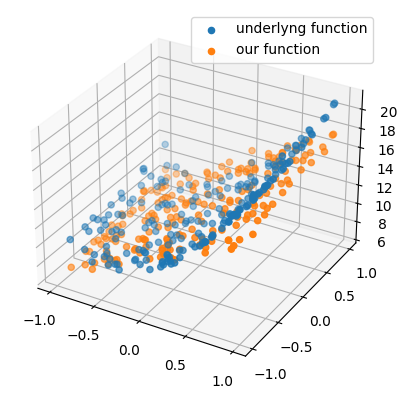

In [10]:
loss = MSE()
linear = Linear(d)
fit(x,y_true,model=linear,loss=loss,lr=0.1,num_epochs=40)   
plot_3d(x,y_true,linear(x)) 

Add non-linearity: ReLU

In [11]:


class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_,0,None)
        return self.output
    
    def backward(self, output_gradient):
        self.input_gradient = (self.input_>0)*output_gradient
        return self.input_gradient
    
relu = Relu()
input_ = np.expand_dims(np.array([1,0.5,0,-0.5,-1]),-1)
print(relu(input_))
print(relu.backward(input_))

    

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


loss:165.3158950982841


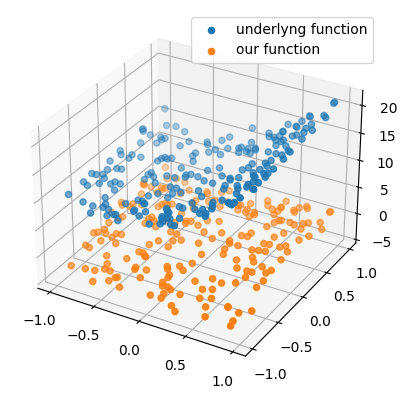

In [45]:
class Model:
    def __init__(self, input_dim, num_hidden):
        self.linear1 = Linear(input_dim, num_hidden)
        self.relu = Relu()
        self.linear2 = Linear(num_hidden,1)
        
    def __call__(self,x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2
    
    def backward(self, output_gradient):
        linear2_gradient = self.linear2.backward(output_gradient)
        relu_gradient =  self.relu.backward(linear2_gradient)
        linear1_gradient =  self.linear1.backward(relu_gradient)
        return linear1_gradient
    
    def update(self,lr):
        self.linear2.update(lr)
        self.linear1.update(lr)
        
loss = MSE()
model = Model(d,10)
y_pred = model(x)
print(f'loss:{loss(y_pred,y_true)}')
loss_gradient = loss.backward()
model.backward(loss_gradient)
plot_3d(x,y_true,y_pred) 

In [47]:
loss = MSE()
model = Model(d,10)
y_pred = model(x)
print(f'loss before update:{loss(y_pred,y_true)}')
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
print(f'loss after update:{loss(y_pred,y_true)}')

loss before update:388.7605221207794
loss after update:57.52038206767555


Epoch:0, loss:0.035059770893317764
Epoch:1, loss:0.03503187456732995
Epoch:2, loss:0.03503795625656856
Epoch:3, loss:0.03501011600863437
Epoch:4, loss:0.03501798892648935
Epoch:5, loss:0.03499022612441488
Epoch:6, loss:0.034999852200393325
Epoch:7, loss:0.03497227651844912
Epoch:8, loss:0.034968187725013644
Epoch:9, loss:0.03494196665820015
Epoch:10, loss:0.03495379726599958
Epoch:11, loss:0.034927671943233624
Epoch:12, loss:0.03494118914334141
Epoch:13, loss:0.034915174671439585
Epoch:14, loss:0.03493037712991727
Epoch:15, loss:0.034904486271046184
Epoch:16, loss:0.034921381106693634
Epoch:17, loss:0.03489562417934277
Epoch:18, loss:0.03491422459895073
Epoch:19, loss:0.03488861141915058


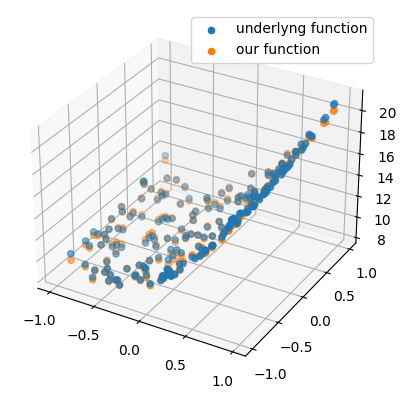

In [44]:
fit(x,y_true,model=model,loss=loss,lr=0.1,num_epochs=20)   
plot_3d(x,y_true,model(x)) 

For pytorch

loss:162.7604522705078


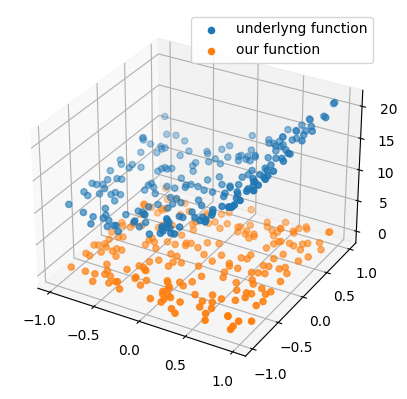

In [51]:
import torch
import torch.nn as nn

class TorchModel(nn.Module):
    def __init__(self,input_dim,num_hidden):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, num_hidden)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden,1)
    
    def forward(self, x):
        l1 = self.linear1(x)
        r =  self.relu(l1)
        l2 =  self.linear2(r)
        return l2
    
loss = nn.MSELoss()
model = TorchModel(d,10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor,y_true_tensor)
print(f'loss:{loss_value}')
plot_3d(x_tensor,y_true_tensor,y_pred_tensor.detach())


In [52]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor,y_true_tensor)
print(f'loss:{loss_value}')
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor,y_true_tensor)
print(f'loss:{loss_value}')

loss:162.7604522705078
loss:149.25595092773438


loss:1.1091980934143066
loss:1.1030960083007812
loss:1.0970330238342285
loss:1.0909572839736938
loss:1.0848772525787354
loss:1.0787863731384277
loss:1.0727087259292603
loss:1.0666695833206177
loss:1.060667872428894
loss:1.0546749830245972
loss:1.048696517944336
loss:1.0427272319793701
loss:1.036768913269043
loss:1.030825138092041
loss:1.0248981714248657
loss:1.01898193359375
loss:1.0130759477615356
loss:1.0071808099746704
loss:1.001297116279602
loss:0.9954257011413574
loss:0.9895657896995544
loss:0.9837190508842468
loss:0.9778837561607361
loss:0.9720627069473267
loss:0.966248095035553
loss:0.9604438543319702
loss:0.9546583294868469
loss:0.9489690661430359
loss:0.943295419216156
loss:0.9376360177993774
loss:0.9319940209388733
loss:0.9263672828674316
loss:0.9207570552825928
loss:0.9151647686958313
loss:0.9095882177352905
loss:0.9040289521217346
loss:0.898495614528656
loss:0.8929762840270996
loss:0.8874737024307251
loss:0.881987988948822
loss:0.8765195608139038
loss:0.8710687160491943
los

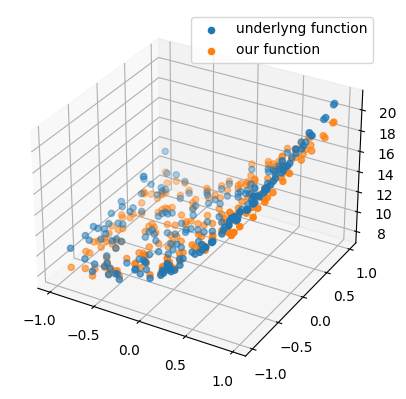

In [57]:
#fit function for torch

from typing import Callable

def torch_fit(x:np.ndarray, y:np.ndarray, model:Callable, loss:Callable, lr:float, num_epochs: int):
    optimiser = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred_tensor = model(x_tensor)
        loss_value = loss(y_pred_tensor,y_true_tensor)
        print(f'loss:{loss_value}')
        loss_value.backward()
        optimizer.step()
        
torch_fit(x_tensor,y_true_tensor,model=model,loss=loss,lr=0.001,num_epochs=100)
plot_3d(x_tensor,y_true_tensor,model(x_tensor).detach())  